# General Usage
## Training start

1) Run the first cell, when its done click "RESTART RUNTIME"

2) Run the second cell

3) Run the last cell to execute


- If you go over in GPU you can restart the runtime and then do steps 2 and three above.


## Drive Mount + Git Pull Push

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/Shareddrives/EECS\ 442\ -\ Project/eecs442-proj
!pip install -r requirements.txt

Mounted at /content/drive
/content/drive/Shareddrives/EECS 442 - Project/eecs442-proj
     |████████████████████████████████| 3.0MB 19.8MB/s 
     |████████████████████████████████| 81kB 10.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
%cd drive/Shareddrives/EECS\ 442\ -\ Project/eecs442-proj
%load_ext autoreload
%autoreload 2

/content/drive/Shareddrives/EECS 442 - Project/eecs442-proj


In [ ]:
#!git config --global user.email "wzahm@umich.edu"
#!git config --global user.name "Wyler Zahm"
#!git status
#!git checkout model_pipeline.py train_model.py
#!git pull
!git add Executor.ipynb config.json model_pipeline.py utils.py train_model.py basemodel_train_hist.txt models
!git commit -m "more gpu training stuff"
!git push
#!git add Executor.ipynb model_pipeline.py train_model.py
#!git commit -m "small changes"

[autoreload of model_pipeline failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ModuleNotFoundError: No module named 'pytorch_msssim'
]


^C
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
	modified:   Executor.ipynb
	modified:   config.json
	modified:   model_pipeline.py
	modified:   train_model.py
	modified:   utils.py

Untracked files:
	00019_00183_indoors_000_010.png
	__pycache__/
	basemodel_train_hist.txt
	densenet169-b2777c0a.pth
	diode/val.tar.gz
	main.txt
	model_checkpoints/
	models/__pycache__/
	models/basemodel_save_0.pt
	models/basemodel_save_12.pt
	models/basemodel_save_16.pt
	models/basemodel_save_20.pt
	models/basemodel_save_24.pt
	models/basemodel_save_28.pt
	models/basemodel_save_32.pt
	models/basemodel_save_36.pt
	models/basemodel_save_4.pt
	models/basemodel_save_8.pt

no changes added to commit
Everything up-to-date


## Data Downloading

In [ ]:
%cd diode
!wget http://diode-dataset.s3.amazonaws.com/val.tar.gz
!tar -zxvf val.tar.gz
%cd ..

!wget https://download.pytorch.org/models/densenet169-b2777c0a.pth

Uninstalling matplotlib-3.1.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.1.3
  Using cached https://files.pythonhosted.org/packages/ce/63/74c0b6184b6b169b121bb72458818ee60a7d7c436d7b1907bd5874188c55/matplotlib-3.4.1-cp37-cp37m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


## Model Exection

In [ ]:
from model_pipeline import main as exec_model
from PIL import Image
import matplotlib
%matplotlib inline

Image.open('./00019_00183_indoors_000_010.png') # Verify PIL is working.
exec_model(use_cuda=True, batch_size=4)

RuntimeError: ignored

In [ ]:
#!pip install torchviz
from torchviz import make_dot
from models.model import ImageDepthPredModel
import torch

x = torch.zeros(1, 3, 768, 1024, dtype=torch.float, requires_grad=True)
model = ImageDepthPredModel()
checkpoint = torch.load("models/basemodel_save_final.pt")
model.load_state_dict(checkpoint['state_dict'])
model.train()
out = model(x)
make_dot(out, params=dict(list(model.named_parameters())+[('x', x)])).render("model_tochviz", format="png")


ModuleNotFoundError: ignored

Data Viz

(768, 1024)


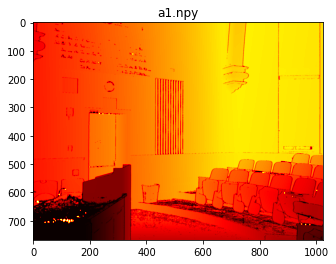

3.8399131


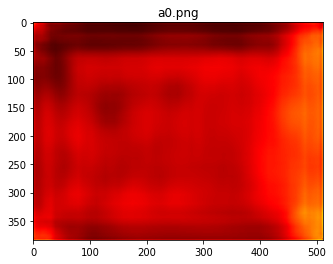

3.8700044


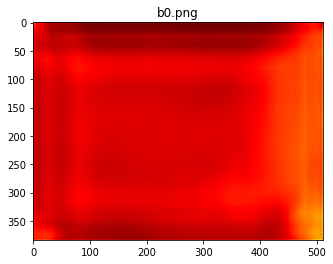

(768, 1024)


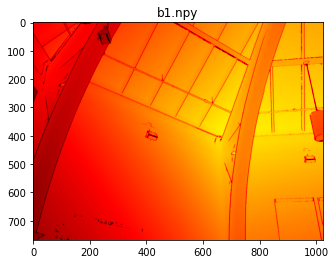

(768, 1024)


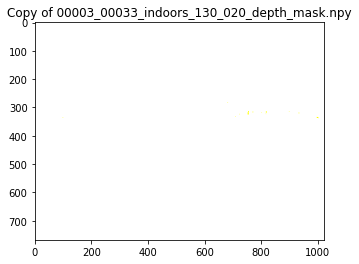

(768, 1024)


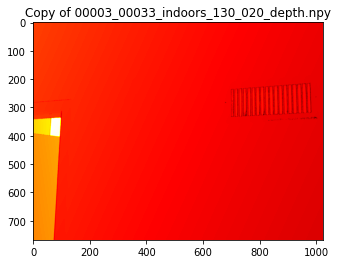

3.8491051


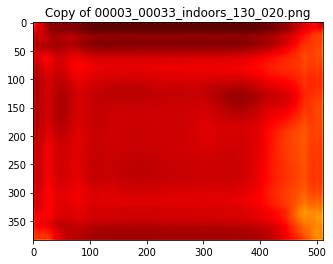

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from models.model import ImageDepthPredModel
import torch

def normalizeImage(img):
  img = img - np.mean(img)
  img[img > 5] = 5
  img[img < -5] = -5
  return img

imgDir = "Experiments/"

model = ImageDepthPredModel()
# checkpoint = torch.load("/content/drive/Shareddrives/EECS 442 - Project/eecs442-proj/models/trained_models/base_model_lr=1e-4 weight_decay=0 batch_size=32 epochs=60/basemodel_save_final.pt")
# checkpoint = torch.load("/content/drive/Shareddrives/EECS 442 - Project/eecs442-proj/models/basemodel_save_32_not_sure.pt")
checkpoint = torch.load("/content/drive/Shareddrives/EECS 442 - Project/eecs442-proj/models/basemodel_save_8full_dataset.pt")
model.load_state_dict(checkpoint['state_dict'])
model.eval()

for filename in os.listdir(imgDir + "inputs"):
  filepath = imgDir + "inputs/" + filename
  if filename.endswith(".png"):
    image = mpimg.imread(filepath)
    image = np.transpose(image, (2, 0, 1))
    image = np.expand_dims(image, axis=0)
    image = torch.tensor(image)
    image = image.type(torch.FloatTensor)
    output = np.squeeze(model(image).cpu().detach().numpy())
    print(np.max(output))
    #cv2.imwrite(imgDir + "outputs/o-" + filename, output)
    # plt.imsave(imgDir + "outputs/o-" + filename, output)
    imgplot = plt.imshow(normalizeImage(output))
    imgplot.set_cmap('hot')
    plt.title(filename)
    plt.show()
  elif filename.endswith(".npy"):
    data = np.squeeze(np.load(filepath))
    print(data.shape)
    # plt.imsave(imgDir + "outputs/o-" + filename + ".png", data)
    imgplot = plt.imshow(normalizeImage(data))
    imgplot.set_cmap('hot')
    plt.title(filename)
    plt.show()

In [ ]:
!git config --global user.email "me"
!git config --global user.name "me"
!git add .
!git status
#!git commit -m "misc"
# !git commit -m "merge conflict"
# !git push
# !google-drive-ocamlfuse -cc